In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

/t3home/dvalsecc/micromamba/envs/pocket-coffea/lib/python3.9/site-packages/coffea/util.py:154: FutureWarning: In coffea version v2023.3.0 (target date: 31 Mar 2023), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [30]:
#filename = "root://ccxrdcms.in2p3.fr:1094/pnfs/in2p3.fr/data/cms/disk/data/store/mc/RunIISummer20UL18NanoAODv9/ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/100000/19922B78-283B-CD48-8A3D-0308D48A824A.root"
filename= "root://rdr.echo.stfc.ac.uk//store/mc/RunIISummer20UL16NanoAODAPVv9/ttHTobb_ttToSemiLep_M125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_preVFP_v11-v1/60000/A578687F-E801-D747-9EDB-5E3CF99A9C5A.root"
events = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema).events()

In [53]:
genparts = events.GenPart
hard_process = genparts.hasFlags(['fromHardProcess','isPrompt','isHardProcess', 'isFirstCopy']) 
last_copy_lepton = genparts.hasFlags(['isPrompt','isLastCopy']) & ~genparts.hasFlags(["fromHardProcess", "isHardProcess"])  
fullyhad = ak.sum((abs(genparts[hard_process].pdgId) >=11 ) &(abs(genparts[hard_process].pdgId) <19), axis=1)==0
semilep = ak.sum((abs(genparts[hard_process].pdgId) >=11 ) &(abs(genparts[hard_process].pdgId) <19), axis=1)==2
fullylep = ak.sum((abs(genparts[hard_process].pdgId) >=11 ) &(abs(genparts[hard_process].pdgId) <19), axis=1)==4
ele = genparts[hard_process & (abs(genparts.pdgId)==11) ] 
semilep_ele_events = ak.num(ele, axis=1) == 1
mu = genparts[hard_process & (abs(genparts.pdgId)==13) ] 
semilep_mu_events = ak.num(mu, axis=1) == 1
tau = genparts[hard_process & (abs(genparts.pdgId)==15) ] 
semilep_tau_events = ak.num(tau, axis=1) == 1

In [59]:
genparts[last_copy_lepton & (abs(genparts.pdgId)== 11)].pdgId[0:100].tolist()

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [11],
 [],
 [],
 [],
 [],
 [-11],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [11],
 [],
 [],
 [],
 [],
 [],
 [11],
 [-11],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [11],
 [],
 [-11],
 [],
 [],
 [],
 [],
 [],
 [],
 [-11],
 [11],
 [],
 [],
 [],
 [],
 [-11],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [11],
 [],
 [],
 [],
 [],
 [],
 [],
 [-11],
 [],
 [-11],
 [],
 [],
 [-11],
 [],
 [],
 [],
 []]

In [32]:
events

<NanoEventsArray [<event 1:3154:2632758>, ... ] type='136940 * event'>

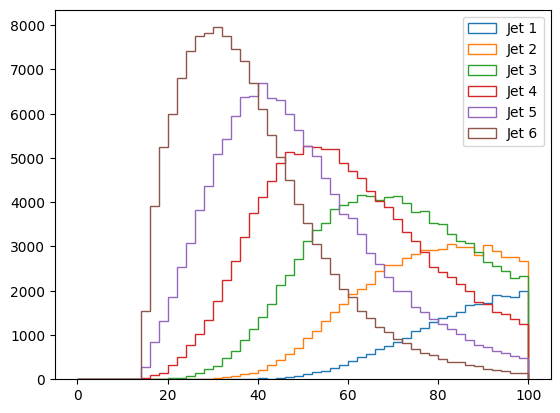

In [33]:
jets_pt = ak.pad_none(events[semilep].Jet.pt, 6)
plt.hist(jets_pt[:,0], bins=50, range=(0, 100), histtype="step", label="Jet 1")
plt.hist(jets_pt[:,1], bins=50, range=(0, 100), histtype="step", label="Jet 2")
plt.hist(jets_pt[:,2], bins=50, range=(0, 100), histtype="step", label="Jet 3")
plt.hist(jets_pt[:,3], bins=50, range=(0, 100), histtype="step", label="Jet 4")
plt.hist(jets_pt[:,4], bins=50, range=(0, 100), histtype="step", label="Jet 5")
plt.hist(jets_pt[:,5], bins=50, range=(0, 100), histtype="step", label="Jet 6")
plt.legend();

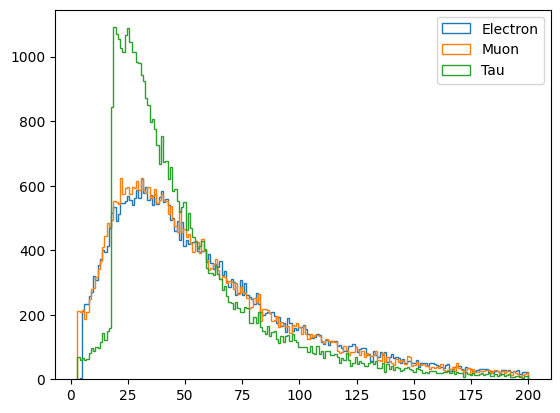

In [20]:
count_E, *_ = plt.hist(ak.pad_none(events[semilep_ele_events].Electron.pt, 1)[:,0], bins=200, range=(3, 200), histtype="step", label="Electron")
count_M, *_ = plt.hist(ak.pad_none(events[semilep_mu_events].Muon.pt, 1)[:,0], bins=200, range=(3,200), histtype="step", label="Muon")
count_T, *_ = plt.hist(ak.pad_none(events[semilep_tau_events].Tau.pt, 1)[:,0], bins=200, range=(3,200), histtype="step", label="Tau")

plt.legend();
#plt.yscale("log")

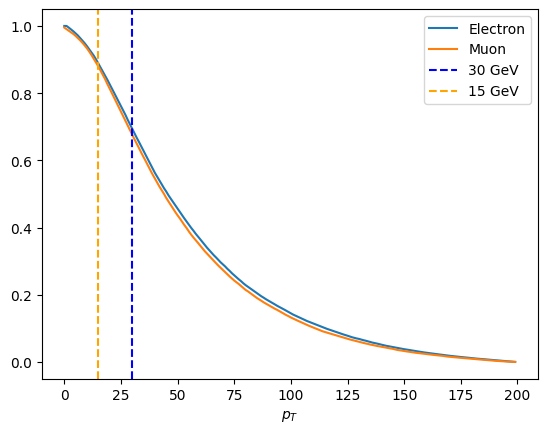

In [52]:
plt.plot((np.sum(count_E) - np.cumsum(count_E))/np.sum(count_E), label="Electron")
plt.plot((np.sum(count_M) - np.cumsum(count_M))/np.sum(count_M), label="Muon")
plt.axvline(30, ls="--", c="b", label="30 GeV")
plt.axvline(15, ls="--", c="orange", label="15 GeV")
plt.xlabel("$p_T$")
plt.legend()

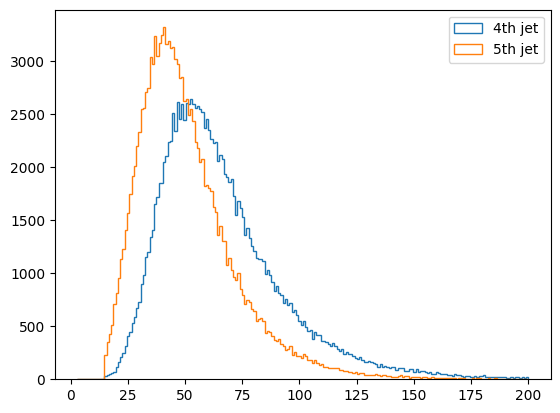

In [171]:
count_J4, *_ = plt.hist(ak.pad_none(events[semilep].Jet.pt, 4)[:,3], bins=200, range=(3, 200), histtype="step", label="4th jet")
count_J5, *_ = plt.hist(ak.pad_none(events[semilep].Jet.pt, 5)[:,4], bins=200, range=(3, 200), histtype="step", label="5th jet")
plt.legend();
#plt.yscale("log")

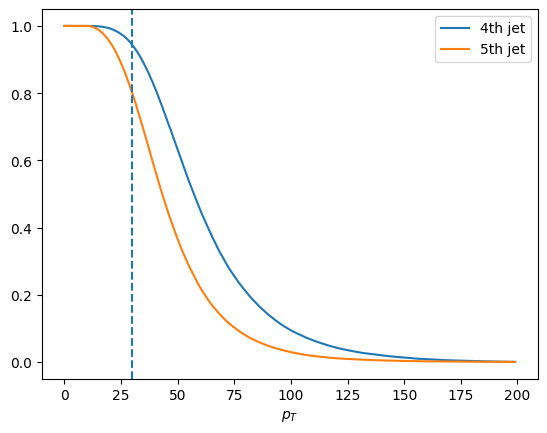

In [172]:
plt.plot((np.sum(count_J4) - np.cumsum(count_J4))/np.sum(count_J4), label="4th jet")
plt.plot((np.sum(count_J5) - np.cumsum(count_J5))/np.sum(count_J5), label="5th jet")
plt.axvline(30, ls="--")
plt.xlabel("$p_T$")
plt.legend()

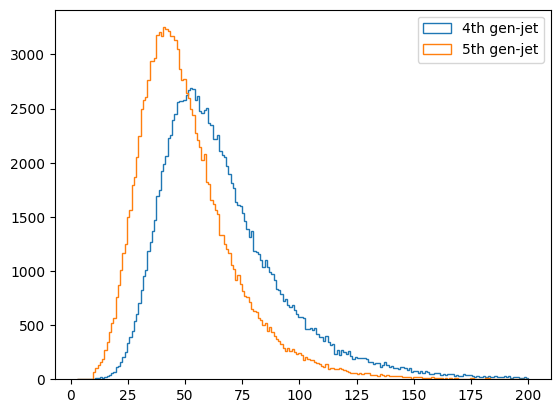

In [12]:
count_J4, *_ = plt.hist(ak.pad_none(events[semilep].GenJet.pt, 4)[:,3], bins=200, range=(3, 200), histtype="step", label="4th gen-jet")
count_J5, *_ = plt.hist(ak.pad_none(events[semilep].GenJet.pt, 5)[:,4], bins=200, range=(3, 200), histtype="step", label="5th gen-jet")
plt.legend();
#plt.yscale("log")

# Analyzing genLevel

In [34]:
genele = ele[semilep_ele_events]

In [15]:
ak.to_numpy(ak.fill_none(ak.pad_none(events.Electron.pt, 1),0)[:,0])

array([13.97892189, 84.00500488, 22.45337486, ..., 13.47672367,
       22.94023323, 31.13616753])

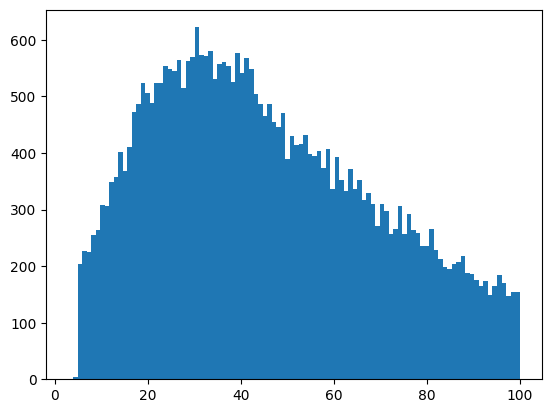

In [16]:
plt.hist(ak.to_numpy(ak.fill_none(ak.pad_none(events[semilep_ele_events].Electron.pt, 1), 0)[:,0]), range=(3, 100), bins=100);

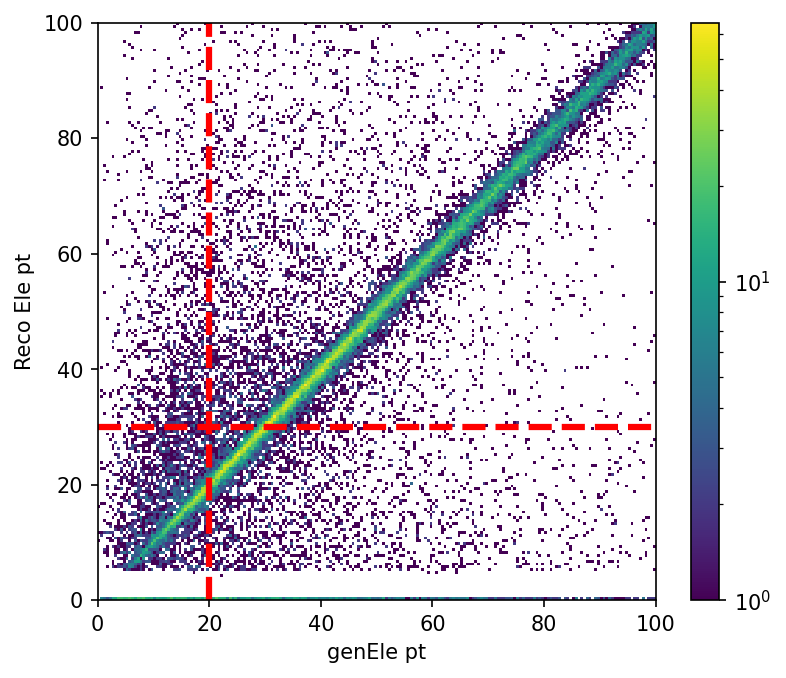

In [17]:
plt.figure(figsize=(6,5), dpi=150)
count_E, *_ = plt.hist2d(ak.to_numpy(genele.pt[:,0]),
                         ak.to_numpy(ak.fill_none(ak.pad_none(events[semilep_ele_events].Electron.pt, 1), 0)[:,0]),
                             bins=(200,200), range=((0, 100),(0,100)), norm=LogNorm()
                        )
plt.xlabel("genEle pt")
plt.ylabel("Reco Ele pt")
plt.colorbar()
plt.axhline(30, ls="--", color="red", linewidth=3)
plt.axvline(20, ls="--", color="red", linewidth=3)

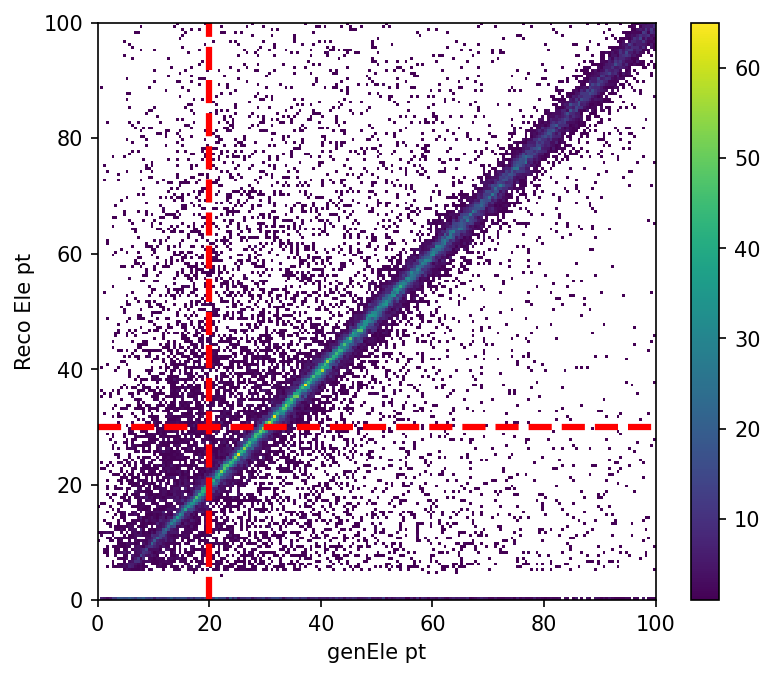

In [177]:
plt.figure(figsize=(6,5), dpi=150)
count_E, *_ = plt.hist2d(ak.to_numpy(genele.pt[:,0]),
                         ak.to_numpy(ak.fill_none(ak.pad_none(events[semilep_ele_events].Electron.pt, 1), 0)[:,0]),
                             bins=(200,200), range=((0, 100),(0,100)),  cmin=1
                        )
plt.xlabel("genEle pt")
plt.ylabel("Reco Ele pt")
plt.colorbar()
plt.axhline(30, ls="--", color="red", linewidth=3)
plt.axvline(20, ls="--", color="red", linewidth=3)

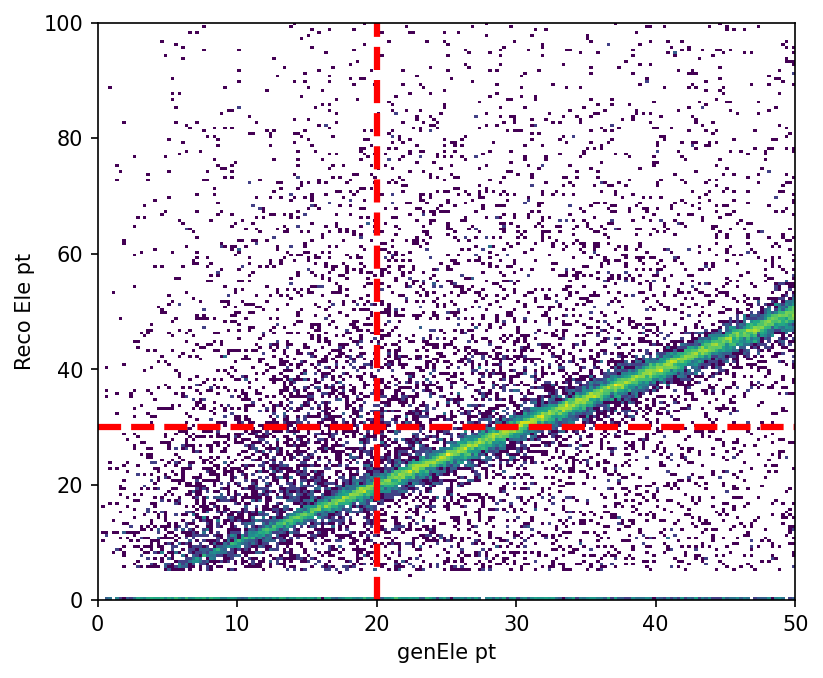

In [180]:
plt.figure(figsize=(6,5), dpi=150)
count_E, *_ = plt.hist2d(ak.to_numpy(genele.pt[:,0]),
                         ak.to_numpy(ak.fill_none(ak.pad_none(events[semilep_ele_events].Electron.pt, 1), 0)[:,0]),
                             bins=(200,200), range=((0, 50),(0,100)), norm=LogNorm()
                        )
plt.xlabel("genEle pt")
plt.ylabel("Reco Ele pt")
plt.axhline(30, ls="--", color="red", linewidth=3)
plt.axvline(20, ls="--", color="red", linewidth=3)

Text(0.5, 0, 'genEle $\\eta$')

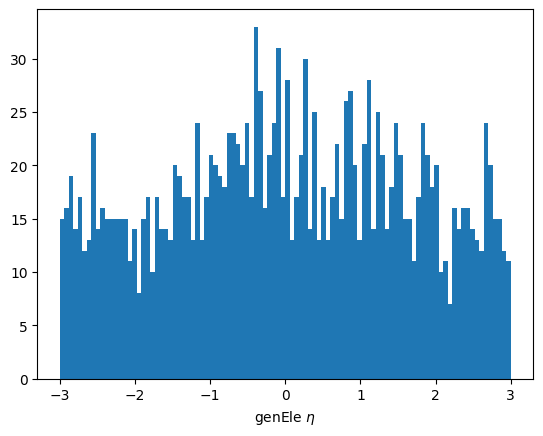

In [41]:
reco_ls30 = ak.fill_none(ak.pad_none(events[semilep_ele_events].Electron.pt, 1), 100)[:,0] > 30
genele1 = genele[reco_ls30]
plt.hist(ak.flatten(genele1[(genele1.pt < 20)].eta), range=(-3, 3), bins=100)
plt.xlabel("genEle $\eta$")

Text(0.5, 0, 'genEle $p_T$')

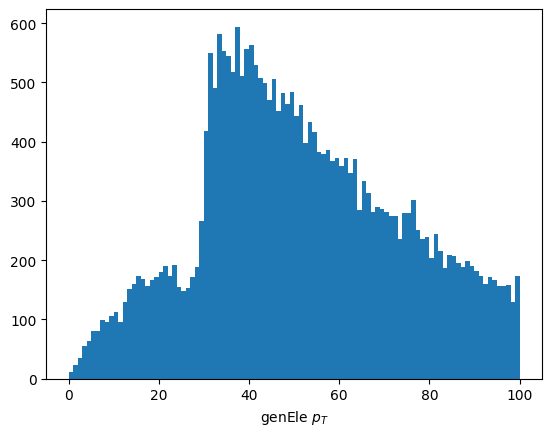

In [18]:
reco_ls30 = ak.fill_none(ak.pad_none(events[semilep_ele_events].Electron.pt, 1), 100)[:,0] > 30
plt.hist(genele[reco_ls30].pt, range=(0, 100), bins=100)
plt.xlabel("genEle $p_T$")

In [132]:
genele.pt<30

<Array [[False], [True], ... [True], [False]] type='79496 * var * bool'>

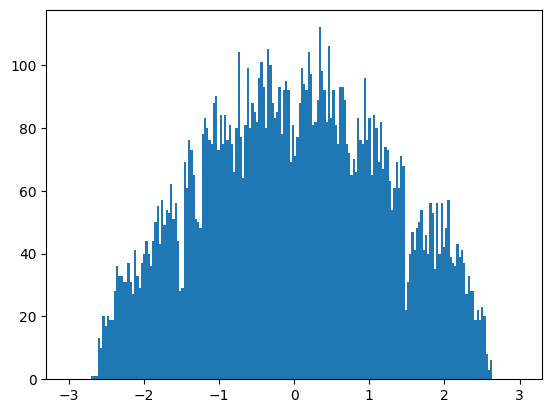

In [155]:
plt.hist(ak.flatten(ak.fill_none(ak.pad_none(events[semilep_ele_events].Electron.eta, 1), 9)[genele.pt<20]), range=(-3,3), bins=200);

In [47]:
results = []
for i in np.arange(0, 30, 1):
    results.append(sum((ak.fill_none(ak.pad_none(events[semilep_ele_events].Electron.pt, 1), 0)[:,0] > 30) & (genele.pt[:,0]<i)) / sum(semilep_ele_events))

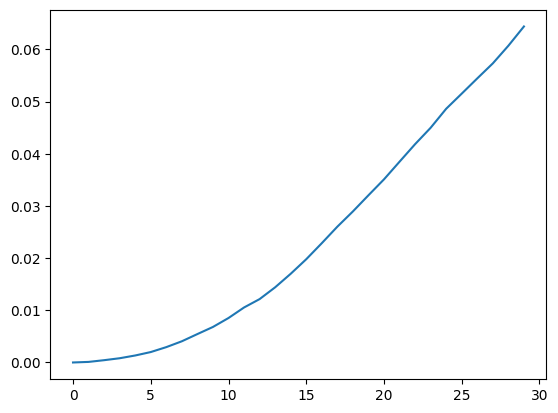

In [49]:
plt.plot(np.arange(0,30,1), results)

## Check taus

In [21]:
tau_evs = events[semilep_tau_events]

(array([3.2372e+04, 0.0000e+00, 1.1394e+04, 0.0000e+00, 1.9270e+03,
        0.0000e+00, 1.9400e+02, 0.0000e+00, 1.5000e+01, 1.0000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

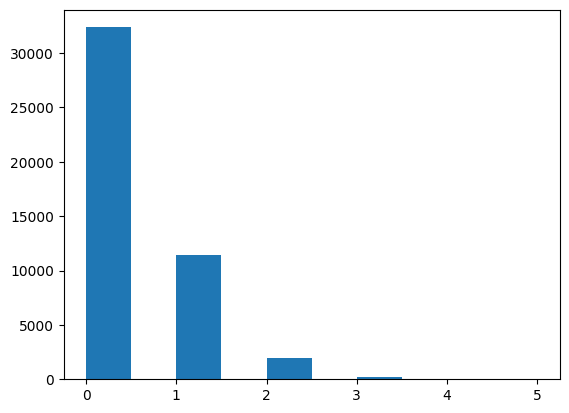

In [23]:
plt.hist(ak.sum(tau_evs.Electron.pt > 30, axis=1))